In [2]:
import numpy as np
import random

import math
import scipy.stats as stats
from scipy.optimize import curve_fit
from scipy.stats import norm

import matplotlib.pyplot as plt

import sys
sys.path.append('./../../')  # Add the parent directory to Python path
from plot_utils import *

## Doppler Cooling

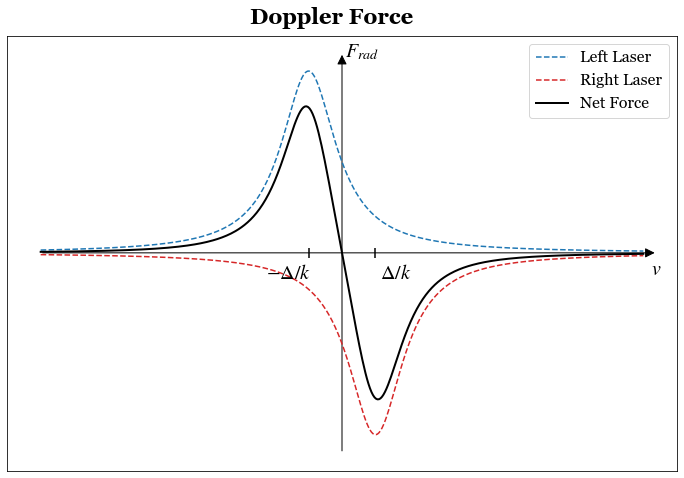

In [134]:
from matplotlib.patches import FancyArrowPatch

# Define constants
Gamma = 1
Delta = -gamma / 2
k = 1


# Define the function
def F_1(v, Delta, k, gamma):
    term1 = 1 / ((Delta - k*v)**2 + (gamma/2)**2)
    return k * (gamma/2)**3 * (term1)

def F_2(v, Delta, k, gamma):
    term1 = 1 / ((Delta - k*v)**2 + (gamma/2)**2)
    term2 = 1 / ((Delta + k*v)**2 + (gamma/2)**2)
    return k * (gamma/2)**3 * (- term2)

def F_rad(v, Delta, k, gamma):
    term1 = 1 / ((Delta - k*v)**2 + (gamma/2)**2)
    term2 = 1 / ((Delta + k*v)**2 + (gamma/2)**2)
    return k * (gamma/2)**3 * (term1 - term2)

fig = plt.figure(figsize=(12, 8))
ax = plt.gca()

vs = np.linspace(-4.5, 4.5, 400)
F_1s = F_1(vs, Delta, k, gamma)
F_2s = F_2(vs, Delta, k, gamma)
F_rads = F_rad(vs, Delta, k, gamma)
ax.plot(vs, F_1s, label='Left Laser', 
            color=tableau_colors[0], linewidth=1.5, linestyle='--')
ax.plot(vs, F_2s, label='Right Laser', 
            color=tableau_colors[3], linewidth=1.5, linestyle='--')
ax.plot(vs, F_rads, label='Net Force', 
            color='black', linewidth=2)
    

# Customize tick sizes
ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
ax.set_xlim(-5, 5)
# ax.set_ylim(-0.5, 0.5)
ax.set_xticks([])
ax.set_yticks([])

# Plot the arrow
arrow_x = FancyArrowPatch((0, -0.55), (0, 0.55), arrowstyle='-|>', 
                          mutation_scale=20, linewidth=1, color='black')
arrow_y = FancyArrowPatch((-4.5, 0), (4.7, 0), arrowstyle='-|>', 
                          mutation_scale=20, linewidth=1, color='black')
ax.add_patch(arrow_x)
ax.add_patch(arrow_y)

# Create a scatter plot with ticks at (-1, 0) and (1, 0)
plt.scatter([-0.5, 0.5], [0, 0], color='black', marker='|', s=100)

# Add labels to the ticks
ax.text(-0.8, -0.03, r'$-\Delta/k$', ha='center', va='top', fontdict=font)
ax.text(0.8, -0.03, r'$\Delta/k$', ha='center', va='top', fontdict=font)
ax.text(0.3, 0.58, r'$F_{rad}$', ha='center', va='top', fontdict=font)
ax.text(4.7, -0.02, r'$v$', ha='center', va='top', fontdict=font)

plt.gcf().set_facecolor('white')
fig.suptitle('Doppler Force', fontproperties=suptitle_font, y=0.93)
plt.legend(loc='upper right', prop=legend_font)

# Show the plot
# plt.savefig('../plots/doppler_force.png')
# plt.savefig('../plots/doppler_force.pdf')
plt.show()

## Rabi, resonant

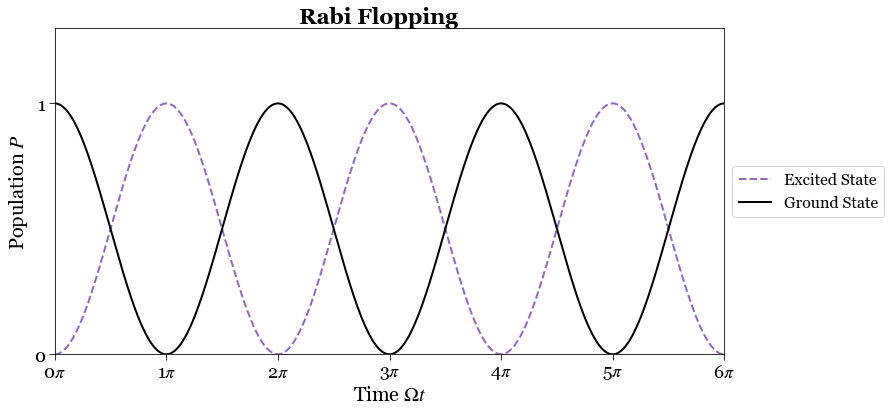

In [3]:
# Define constants
Rabi = 1

# Zeroth-order spectrum, just Doppler broadening
def P_g(t):
    return 0.5 * (1 + np.cos(Rabi * t))

def P_e(t):
    return 0.5 * (1 - np.cos(Rabi * t))

fig = plt.figure(figsize=(12, 6))
ax = plt.gca()

ts = np.linspace(0, 6 * np.pi, 1000)
P_es = [P_e(t) for t in ts]
P_gs = [P_g(t) for t in ts]
ax.plot(ts, P_es, label='Excited State', 
            color=tableau_colors[4], linewidth=2, linestyle='--')
ax.plot(ts, P_gs, label='Ground State', 
            color='black', linewidth=2)

# Customize tick sizes
ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
ax.set_xlim(0, 6 * np.pi)
ax.set_ylim(0, 1.3)
ax.set_xticks([x * np.pi for x in range(7)])
ax.set_yticks([0, 1])
ax.set_xticklabels([str(x) + r'$\pi$' for x in range(7)], fontdict=tick_font)
ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
# ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))

# Customize the plot (optional)
plt.xlabel('Time ' + r'$\Omega t$', fontdict=font)
plt.ylabel('Population ' + r'$P$', fontdict=font)
plt.gcf().set_facecolor('white')
fig.suptitle('Rabi Flopping', fontproperties=suptitle_font, y=0.93)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop=legend_font)

# Show the plot
# plt.savefig('your_figure.png', bbox_inches='tight')

# plt.savefig('../plots/rabi_flopping.png', bbox_inches='tight')
# plt.savefig('../plots/rabi_flopping.pdf', bbox_inches='tight')
plt.show()

## Rabi, weak/ strong

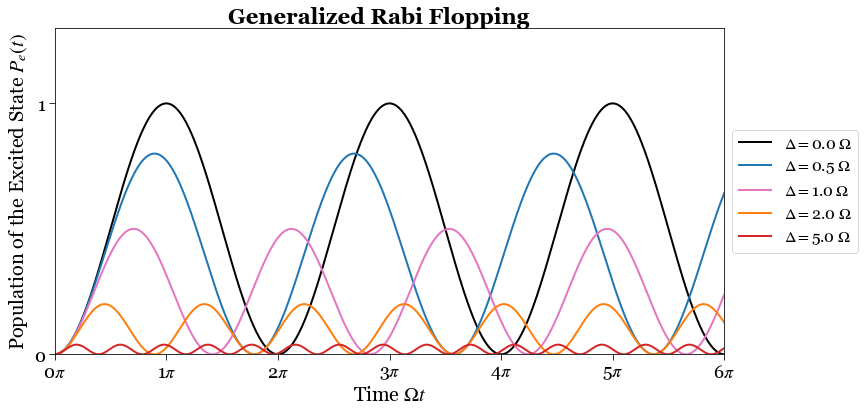

In [4]:
# Define constants
Rabi = 1

def P_e(t, Delta):
    Rabi_eff = np.sqrt(Rabi**2 + Delta**2)
    factor = Rabi**2 / Rabi_eff**2
    return factor * 0.5 * (1 - np.cos(Rabi_eff * t))

fig = plt.figure(figsize=(12, 6))
ax = plt.gca()

Deltas = np.array([0, 0.5, 1, 2, 5]) * Rabi
ts = np.linspace(0, 6 * np.pi, 1000)
colors = ['black', tableau_colors[0], tableau_colors[6], tableau_colors[1], tableau_colors[3]]
for i, Delta in enumerate(Deltas):
    P_es = [P_e(t, Delta) for t in ts]
    ax.plot(ts, P_es, label=r'$\Delta = $' + f'{Delta}' + r' $\Omega$',
                color=colors[i], linewidth=2)

# Customize tick sizes
ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
ax.set_xlim(0, 6 * np.pi)
ax.set_ylim(0, 1.3)
ax.set_xticks([x * np.pi for x in range(7)])
ax.set_yticks([0, 1])
ax.set_xticklabels([str(x) + r'$\pi$' for x in range(7)], fontdict=tick_font)
ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
# ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))

# Customize the plot (optional)
plt.xlabel('Time ' + r'$\Omega t$', fontdict=font)
plt.ylabel('Population of the Excited State ' + r'$P_e(t)$', fontdict=font)
plt.gcf().set_facecolor('white')
fig.suptitle('Generalized Rabi Flopping', fontproperties=suptitle_font, y=0.93)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop=legend_font)

# Show the plot
# plt.savefig('../plots/rabi_detunings.png', bbox_inches='tight')
# plt.savefig('../plots/rabi_detunings.pdf', bbox_inches='tight')
plt.show()

## Avoided Crossing

In [ ]:
from matplotlib.patches import FancyArrowPatch

# Define constants
Gamma = 1
Delta = -gamma / 2
k = 1


# Define the function
def F_1(v, Delta, k, gamma):
    term1 = 1 / ((Delta - k*v)**2 + (gamma/2)**2)
    return k * (gamma/2)**3 * (term1)

def F_2(v, Delta, k, gamma):
    term1 = 1 / ((Delta - k*v)**2 + (gamma/2)**2)
    term2 = 1 / ((Delta + k*v)**2 + (gamma/2)**2)
    return k * (gamma/2)**3 * (- term2)

def F_rad(v, Delta, k, gamma):
    term1 = 1 / ((Delta - k*v)**2 + (gamma/2)**2)
    term2 = 1 / ((Delta + k*v)**2 + (gamma/2)**2)
    return k * (gamma/2)**3 * (term1 - term2)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

vs = np.linspace(-4.5, 4.5, 400)
F_1s = F_1(vs, Delta, k, gamma)
F_2s = F_2(vs, Delta, k, gamma)
F_rads = F_rad(vs, Delta, k, gamma)


axs[0].plot(vs, F_1s, label='Left Laser', 
            color=tableau_colors[0], linewidth=1.5, linestyle='--')
axs[0].plot(vs, F_2s, label='Right Laser', 
            color=tableau_colors[3], linewidth=1.5, linestyle='--')
axs[0].plot(vs, F_rads, label='Net Force', 
            color='black', linewidth=2)
    

# Customize tick sizes
axs[0].tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
axs[0].set_xlim(-5, 5)
# ax.set_ylim(-0.5, 0.5)
axs[0].set_xticks([])
axs[0].set_yticks([])

# Plot the arrow
arrow_x = FancyArrowPatch((0, -0.55), (0, 0.55), arrowstyle='-|>', 
                          mutation_scale=20, linewidth=1, color='black')
arrow_y = FancyArrowPatch((-4.5, 0), (4.7, 0), arrowstyle='-|>', 
                          mutation_scale=20, linewidth=1, color='black')
axs[0].add_patch(arrow_x)
axs[0].add_patch(arrow_y)

# Create a scatter plot with ticks at (-1, 0) and (1, 0)
plt.scatter([-0.5, 0.5], [0, 0], color='black', marker='|', s=100)

# Add labels to the ticks
axs[0].text(-0.8, -0.03, r'$-\Delta/k$', ha='center', va='top', fontdict=font)
axs[0].text(0.8, -0.03, r'$\Delta/k$', ha='center', va='top', fontdict=font)
axs[0].text(0.3, 0.58, r'$F_{rad}$', ha='center', va='top', fontdict=font)
axs[0].text(4.7, -0.02, r'$v$', ha='center', va='top', fontdict=font)

plt.gcf().set_facecolor('white')
fig.suptitle('Doppler Force', fontproperties=suptitle_font, y=0.93)
plt.legend(loc='upper right', prop=legend_font)

# Show the plot
# plt.savefig('../plots/doppler_force.png')
# plt.savefig('../plots/doppler_force.pdf')
plt.show()

## Chirp

## Power Broadening

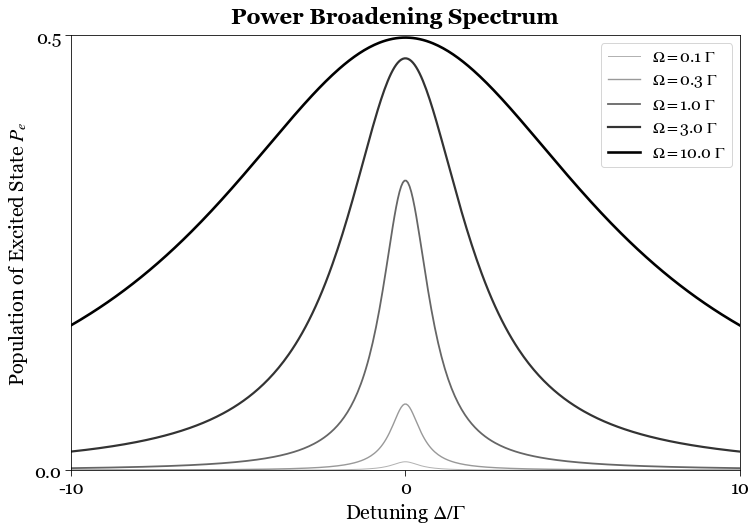

In [166]:
# Define constants
Gamma = 1

# Zeroth-order spectrum, just Doppler broadening
def rho_ee(Delta, Rabi):
    return (Rabi**2 / Gamma**2) / (1 + (2 * Delta / Gamma)**2 + 2 * (Rabi)**2 / (Gamma)**2)

fig = plt.figure(figsize=(12, 8))
ax = plt.gca()

Deltas = np.linspace(-10, 10, 400)

# Calculate various Rabi frequency for pump powers
ratios = np.array([0.1, 0.3, 1, 3, 10])
alphas = np.array([0.3, 0.4, 0.6, 0.8, 1])
widths = 2 * np.array([0.5, 0.7, 0.9, 1.1, 1.3])

P_es = []
for i, ratio in enumerate(ratios):
    Rabi = ratio * Gamma
    P_e = [rho_ee(Delta, Rabi) for Delta in Deltas]
    P_es.append(P_e)

# Plot the result
for i in range(len(ratios)):
    ax.plot(Deltas, P_es[i], label=r'$\Omega=$' + str(ratios[i]) + r' $\Gamma$', 
            color='black', alpha=alphas[i], linewidth=widths[i])

# Customize tick sizes
ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
ax.set_xlim(-10, 10)
ax.set_ylim(0, 0.5)
ax.set_xticks([-10, 0, 10])
ax.set_yticks([0, 0.5])
ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.1f}'))

# Customize the plot (optional)
plt.xlabel('Detuning ' + r'$\Delta/\Gamma$', fontdict=font)
plt.ylabel('Population of Excited State ' + r'$P_e$', fontdict=font)
plt.gcf().set_facecolor('white')
fig.suptitle('Power Broadening Spectrum', fontproperties=suptitle_font, y=0.93)
plt.legend(loc='upper right', prop=legend_font)

# Show the plot
# plt.savefig('../plots/power_broadening_spectrum.png')
# plt.savefig('../plots/power_broadening_spectrum.pdf')
plt.show()

## Lamb Dip

In [13]:
# Define constants
Gamma = 1
gamma_perp = Gamma / 2 # non-collisional 
kvs = np.linspace(- 5 * 10, 5 * 10, 1000)
std = 10 * Gamma

# Zeroth-order spectrum, just Doppler broadening
def S_a_0(Delta):
    integral = np.sum((2 * gamma_perp) / (gamma_perp ** 2 + (Delta + kvs) ** 2) 
                      * norm.pdf(kvs, loc=0, scale=std))
    return integral / len(kvs)  # Average over k_v values

# Next-order spectrum, includes the Lamb dip
def S_a_2(Delta):
    # Define the integrand functions
    integrand1 = -(2 * gamma_perp**2 / Gamma
                / ((gamma_perp**2 + (Delta - kvs)**2) 
                *  (gamma_perp**2 + (Delta + kvs)**2)))
    
    integrand2 = (1j * 2 * kvs / 2
                / ((gamma_perp + 1j * (Delta - kvs))
                * (Gamma - 1j * 2 * kvs)
                * (gamma_perp + 1j * (Delta - 3 * kvs))
                * (gamma_perp - 1j * (Delta + kvs))))
    
    integrand3 = -(gamma_perp - 1j * 2 * kvs
                / ((Gamma - 1j * 2 * kvs)
                * (gamma_perp + 1j * (Delta - 3 * kvs))
                * (gamma_perp - 1j * (Delta + kvs))**2))
    
    integral = np.sum((integrand1 + integrand2 + np.conj(integrand2) 
            + integrand3 + np.conj(integrand3)) * norm.pdf(kvs, loc=0, scale=std))
    
    return integral / len(kvs)  # Average over k_v values


/Users/chuan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/chuan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/chuan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/chuan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_7379/1349516183.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([-20, 0, 20], fontdict=tick_font)
/var/fol

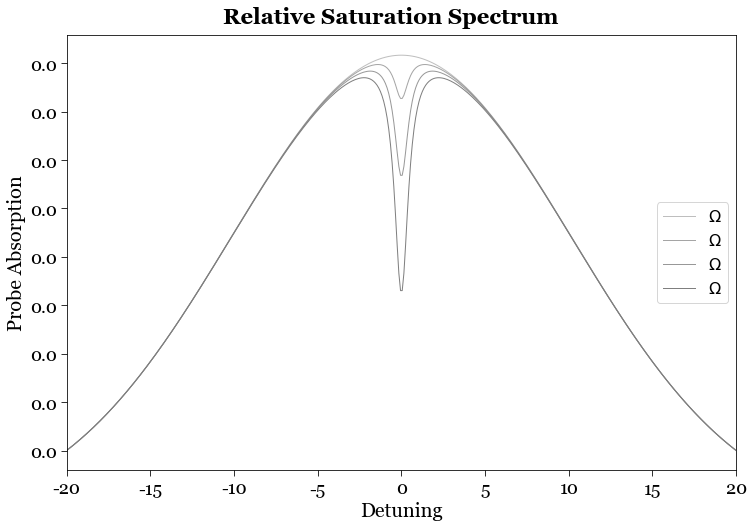

In [22]:
fig = plt.figure(figsize=(12, 8))
ax = plt.gca()

Deltas = np.linspace(-20, 20, 400)

# Calculate various Rabi frequency for pump powers
ratios = np.array([0, 0.3, 0.5, 0.7])
alphas = np.array([0.5, 0.7, 0.8, 1])
fudges = np.array([1, 0.9, 0.8, 0.7])
absorptions = []
for i, ratio in enumerate(ratios):
    Rabi = ratio * Gamma
    absorption = [S_a_0(Delta) + Rabi**2 * S_a_2(Delta) for Delta in Deltas]
    start = absorption[0]
    absorptions.append(absorption - start)

# Plot the result
for i in range(len(ratios)):
    ax.plot(Deltas, absorptions[i], label=r'$\Omega$', 
            color=tableau_colors[7], alpha=alphas[i], linewidth=1.0)

# Customize tick sizes
ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
ax.set_xlim(-20, 20)
# ax.set_ylim(0, 1.2)
ax.set_xticklabels([-20, 0, 20], fontdict=tick_font)
ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.1f}'))

# Customize the plot (optional)
plt.xlabel('Detuning', fontdict=font)
plt.ylabel('Probe Absorption', fontdict=font)
plt.gcf().set_facecolor('white')
fig.suptitle('Relative Saturation Spectrum', fontproperties=suptitle_font, y=0.93)
plt.legend(loc='center right', prop=legend_font)

# Show the plot
# plt.savefig('./plots/optimized_transmit_energies.png')
plt.show()

In [ ]:
# Perhaps the power broadening is an additional effect added by studying previous plots
